In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
result = pd.read_csv ("AnomaliesSample.csv", header=0);
result.info()

NameError: name 'pd' is not defined

In [15]:
result['data'] = pd.to_datetime (result['data'])
result = result.set_index(result.data)
dfClass = result['class']
result = pd.DataFrame (result['pa'] + result['pb']+ result['pc'], columns=['P'])
result['class'] = dfClass
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4509068 entries, 2019-03-19 00:00:00 to 2019-04-09 23:59:59
Data columns (total 2 columns):
P        float64
class    int64
dtypes: float64(1), int64(1)
memory usage: 103.2 MB


In [16]:
## Cria classe fake
#result ['class']=1
#temp = result.copy()
#temp['class']=0
#result = pd.concat([result, temp], axis=0)

## separa por classes
result0 = result[result['class']==0]
result0 = result0.drop('class', axis=1)
result1 = result[result['class']==1]
result1 = result1.drop('class', axis=1)

## Resampling column description
* **P_mean**: média da noite toda (dropped before classification)

* **P_var**: variancia da noite toda

* **P_amplitude**: max - min das dos dados agrupados por 1h (>0 para oscilações de baixa frequencia)

* **Atividade_noturna**: (média das 00:00 as 05:00)/(média das 7:30 as 11:30)

* **Fator de carga**: max/medio (a partir das médias de 5 minutos)


In [46]:
hourly = result0.resample('H').mean()

resampled0 = result0.between_time('00:00:00', '05:00:00').resample('B').agg({
    'P':['mean', 'std']
})
resampled0['P_amplitude'] = hourly.between_time('00:00:00', '05:00:00').resample('B').max() - hourly.between_time('00:00:00', '05:00:00').resample('B').min()
resampled0.columns = resampled0.columns.map('_'.join)

resampled0 ['fator_de_carga'] = result0.between_time('00:00:00', '05:00:00').resample('B').max()/result0.between_time('00:00:00', '05:00:00').resample('B').mean()
resampled0 ['atividade_noturna']= hourly.between_time('00:00:00', '05:00:00').resample('B').mean()/hourly.between_time('07:30:00', '11:30:00').resample('D').mean()
resampled0 = resampled0.dropna()

# Transform standant deviation and amplitude to Coeficient of Variation
resampled0 ['P_std'] = resampled0 ['P_std'] / resampled0['P_mean']
resampled0 ['P_amplitude_'] = resampled0 ['P_amplitude_'] / resampled0['P_mean']

# The mean will be useless in the final analysis, drop it
resampled0 = resampled0.drop ('P_mean', axis=1)
resampled0['class']=0
resampled0

,P_std,P_amplitude_,fator_de_carga,atividade_noturna,class
data,,,,,
2019-03-19,0.056829,0.072916,1.186477,0.859900,0
2019-03-20,0.068770,0.061408,1.286946,0.383837,0
2019-03-21,0.033092,0.021456,1.152179,0.764407,0
2019-03-22,0.351805,0.836290,1.974151,0.535029,0
2019-03-25,0.033282,0.032818,1.109079,0.665575,0
2019-03-26,0.077404,0.144023,1.350438,0.372130,0
2019-03-27,0.043162,0.058186,1.211855,0.717942,0
2019-03-28,0.070051,0.047278,1.317494,0.450270,0
2019-03-29,0.280783,0.678398,1.396189,0.638979,0


In [42]:
hourly = result1.resample('H').mean()

resampled0 = result1.between_time('00:00:00', '05:00:00').resample('B').agg({
    'P':['mean', 'std']
})
resampled0['P_amplitude'] = hourly.between_time('00:00:00', '05:00:00').resample('B').max() - hourly.between_time('00:00:00', '05:00:00').resample('B').min()
resampled0.columns = resampled0.columns.map('_'.join)

resampled0 ['fator_de_carga'] = result1.between_time('00:00:00', '05:00:00').resample('B').max()/result1.between_time('00:00:00', '05:00:00').resample('B').mean()
resampled0 ['atividade_noturna']= hourly.between_time('00:00:00', '05:00:00').resample('B').mean()/hourly.between_time('07:30:00', '11:30:00').resample('B').mean()
resampled0 = resampled0.dropna()

# Transform standant deviation and amplitude to Coeficient of Variation
resampled0 ['P_std'] = resampled0 ['P_std']*100 / resampled0['P_mean']
resampled0 ['P_amplitude_'] = resampled0 ['P_amplitude_']*100 / resampled0['P_mean']

# The mean will be useless in the final analysis, drop it
resampled0 = resampled0.drop ('P_mean', axis=1)
resampled0['class']=0
resampled0

,P_std,P_amplitude_,fator_de_carga,atividade_noturna,class
data,,,,,
2019-03-11,7.736480,8.024382,1.384521,0.350807,0
2019-03-12,6.091608,8.116153,1.359713,0.297926,0
2019-03-13,7.238418,10.330854,1.296258,0.312601,0
2019-03-14,7.570963,3.522568,1.336491,0.354607,0
2019-03-15,7.198791,20.340815,1.456514,0.370113,0
2019-03-18,5.792710,5.511655,1.278018,0.294882,0
2019-03-19,6.349784,13.093767,1.317226,0.378914,0
2019-03-20,7.198518,8.533848,1.310100,0.323515,0
2019-03-21,7.017745,14.650419,1.288013,0.340039,0


In [52]:
merged = pd.concat([resampled0, resampled1], axis=0)
# minMax normalization 
normalized=(merged-merged.min())/(merged.max()-merged.min())

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(normalized.drop('class',axis=1), 
                                                    normalized['class'], test_size=0.3)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.89      1.00      0.94         8

   micro avg       0.92      0.92      0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12

Confusion matrix:
 [[3 1]
 [0 8]]


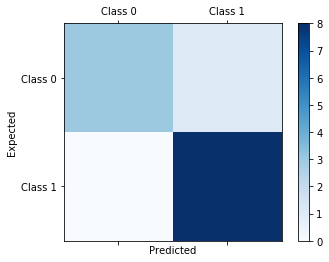

In [58]:
## Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

predictions = logmodel.predict(X_test)

## Classification report
# Precision = TP/(TP+FP)
# Recall (or sensibility) = TP/(TP+FN) 
print('Classification report:\n', classification_report(y_test,predictions))

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('\n\nConfusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()